This script contains the following:

1. Importing libraries and data and renaming columns
2. Subsetting, wrangling, and cleaning time-series data
3. Time-series analysis: decomposition
4. Testing for stationarity
5. Stationarizing the Data
6. Check out the autocorrelations

# 1. Importing Libraries and Dataframe

In [61]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [62]:
# Configure API key 

quandl.ApiConfig.api_key = 'XQhPjRWUn4q4g2KGE_Uj'

In [63]:
# Importing the Federal Reserve Economic Data "Youth Unemployment Rate for Brazil" variable.

data = quandl.get('ECONOMIST/BIGMAC_BRA')

In [64]:
data.head(5)

,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation
Date,,,,,,,,,,
2000-04-30,2.95,1.79,1.65,1.175299,-34.340849,NaN,NaN,NaN,NaN,NaN
2001-04-30,3.60,2.19,1.64,1.417323,-35.282062,NaN,NaN,NaN,NaN,NaN
2002-04-30,3.60,2.34,1.55,1.445783,-38.214396,NaN,NaN,NaN,NaN,NaN
2003-04-30,4.55,3.07,1.44,1.678967,-45.310528,NaN,NaN,NaN,NaN,NaN
2004-05-31,5.40,3.18,1.70,1.862069,-41.444372,NaN,NaN,NaN,NaN,NaN


In [65]:
data.shape

(37, 10)

In [66]:
data.columns

Index(['local_price', 'dollar_ex', 'dollar_price', 'dollar_ppp',
       'dollar_valuation', 'dollar_adj_valuation', 'euro_adj_valuation',
       'sterling_adj_valuation', 'yen_adj_valuation', 'yuan_adj_valuation'],
      dtype='object')

In [67]:
type(data)

pandas.core.frame.DataFrame

# 2. Subsetting, wrangling, and cleaning time-series data

In [68]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [69]:
data_2.head()

,Date,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation
0,2000-04-30,2.95,1.79,1.65,1.175299,-34.340849,NaN,NaN,NaN,NaN,NaN
1,2001-04-30,3.60,2.19,1.64,1.417323,-35.282062,NaN,NaN,NaN,NaN,NaN
2,2002-04-30,3.60,2.34,1.55,1.445783,-38.214396,NaN,NaN,NaN,NaN,NaN
3,2003-04-30,4.55,3.07,1.44,1.678967,-45.310528,NaN,NaN,NaN,NaN,NaN
4,2004-05-31,5.40,3.18,1.70,1.862069,-41.444372,NaN,NaN,NaN,NaN,NaN


In [70]:
# reducing the samples to only those columns necessary for the chart, namely “prices” and “order_hour_of_day”
data_rel = data_2[['Date','dollar_ppp']]

In [71]:
data_rel.head(50)

,Date,dollar_ppp
0,2000-04-30,1.175299
1,2001-04-30,1.417323
2,2002-04-30,1.445783
3,2003-04-30,1.678967
4,2004-05-31,1.862069
5,2005-06-30,1.928105
6,2006-01-31,1.968254
7,2006-05-31,2.064516
8,2007-01-31,1.987578
9,2007-06-30,2.023460


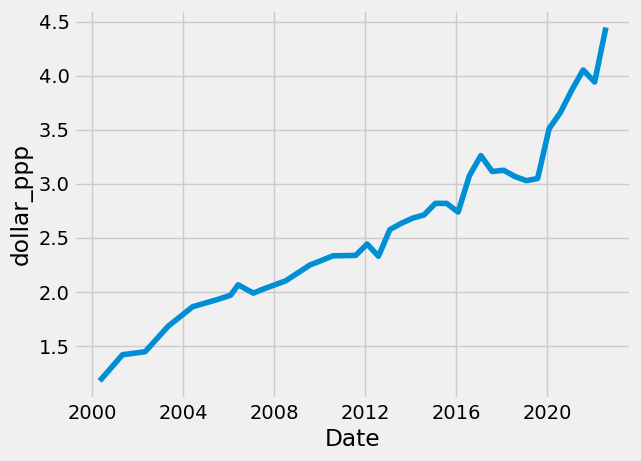

In [72]:
# creating the line chart using seaborn
line = sns.lineplot(data = data_rel, x = 'Date', y = 'dollar_ppp')

In [83]:
# As my projects dataset contains the years 2016-2018, the years before year 2000 will be removed

data_sub = data_rel.loc[(data_rel['Date'] > '2009-07-31')]

In [84]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,dollar_ppp
datetime,
2010-01-31,2.290503
2010-07-31,2.333036
2011-07-31,2.337023
2012-01-31,2.442093
2012-07-31,2.329289


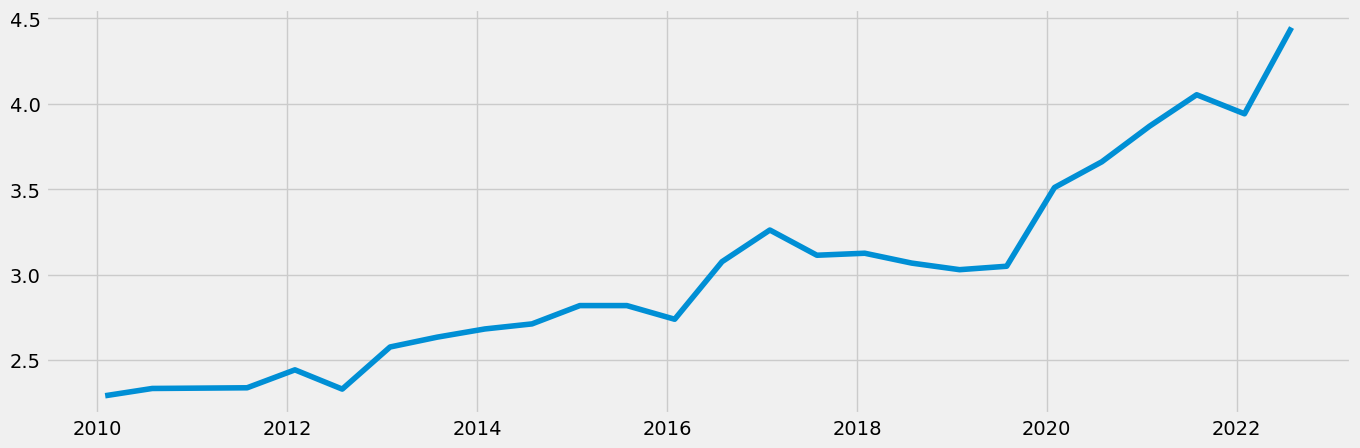

In [85]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [76]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

dollar_ppp    0
dtype: int64

In [77]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

1

In [86]:
data_sub.dtypes

dollar_ppp    float64
dtype: object

In [87]:
data_sub.head(60)

,dollar_ppp
datetime,
2010-01-31,2.290503
2010-07-31,2.333036
2011-07-31,2.337023
2012-01-31,2.442093
2012-07-31,2.329289
2013-01-31,2.575906
2013-07-31,2.633504
2014-01-31,2.681564
2014-07-31,2.711157


# 3. Time-series analysis: decomposition

In [96]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=1)

In [97]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

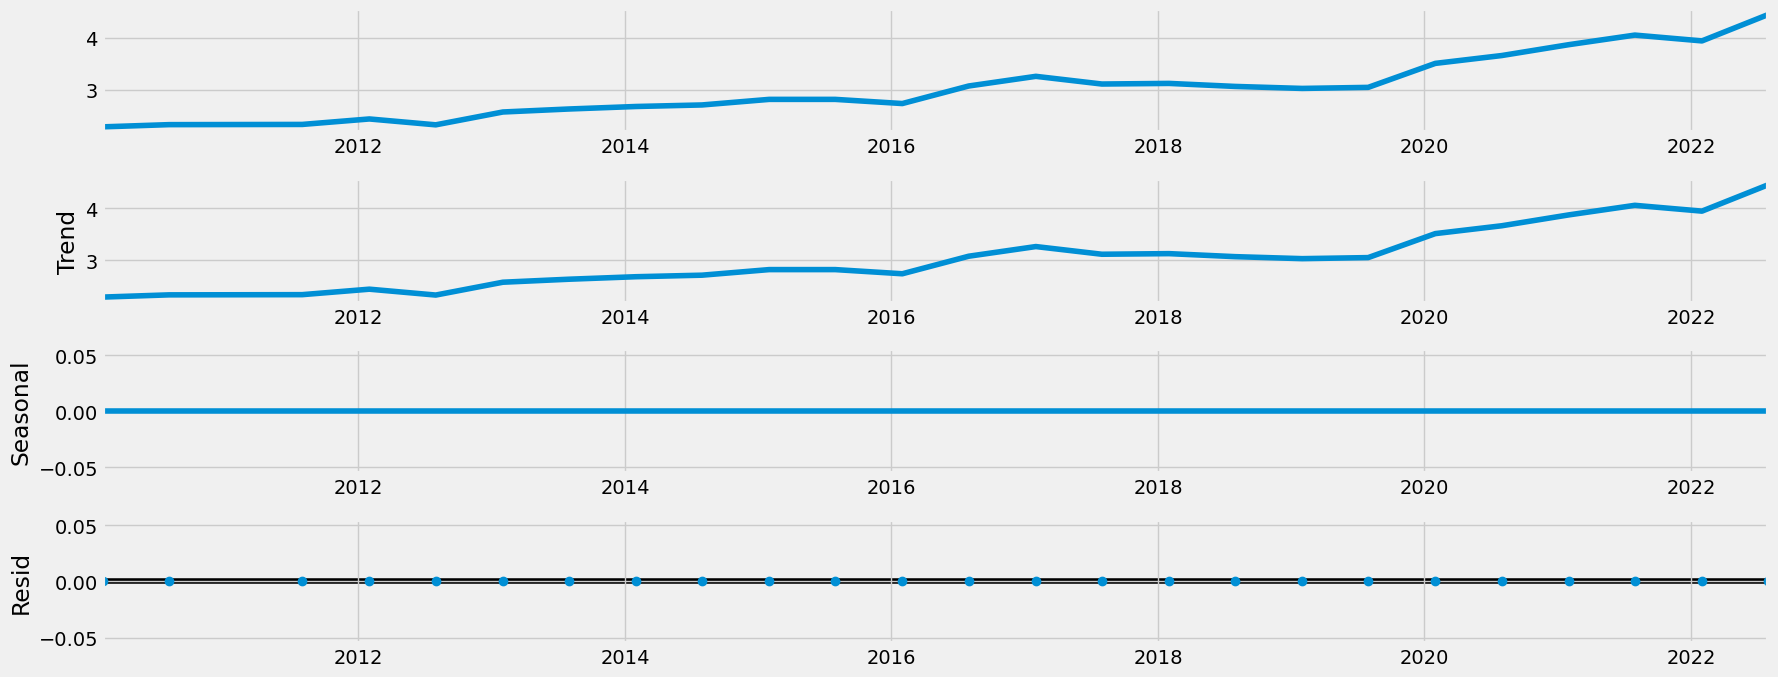

In [100]:
# Plot the separate components

decomposition.plot()
plt.show()

There is no seasonality and also no resid. It seems this is caused by the fact that only two values per year are included in this dataset. Most probably, the seasonality graph would look different, if the data would have been recorded once per quarter.

### 4. Testing for stationarity

In [102]:
data_sub.head()

,dollar_ppp
datetime,
2010-01-31,2.290503
2010-07-31,2.333036
2011-07-31,2.337023
2012-01-31,2.442093
2012-07-31,2.329289


In [103]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['dollar_ppp'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.950961
p-value                         0.993721
Number of Lags Used             0.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


If we use a significance level of 5 percent, we need to look at the Critical Value (5%) results, which is -2.99 in this case. This is much smaller than the test statistic, which means we can not reject the null hypothesis. The null hypothesis in this case is the presence of a unit root (we want to disprove that there’s a unit root, which would mean that our data is stationary). This means there is a unit root in the data, and the data is non-stationary. 

### 5. Stationarizing the Data

In [104]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [105]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [106]:
data_diff.head()

,dollar_ppp
datetime,
2010-07-31,0.042533
2011-07-31,0.003988
2012-01-31,0.105069
2012-07-31,-0.112803
2013-01-31,0.246616


In [107]:
data_diff.columns

Index(['dollar_ppp'], dtype='object')

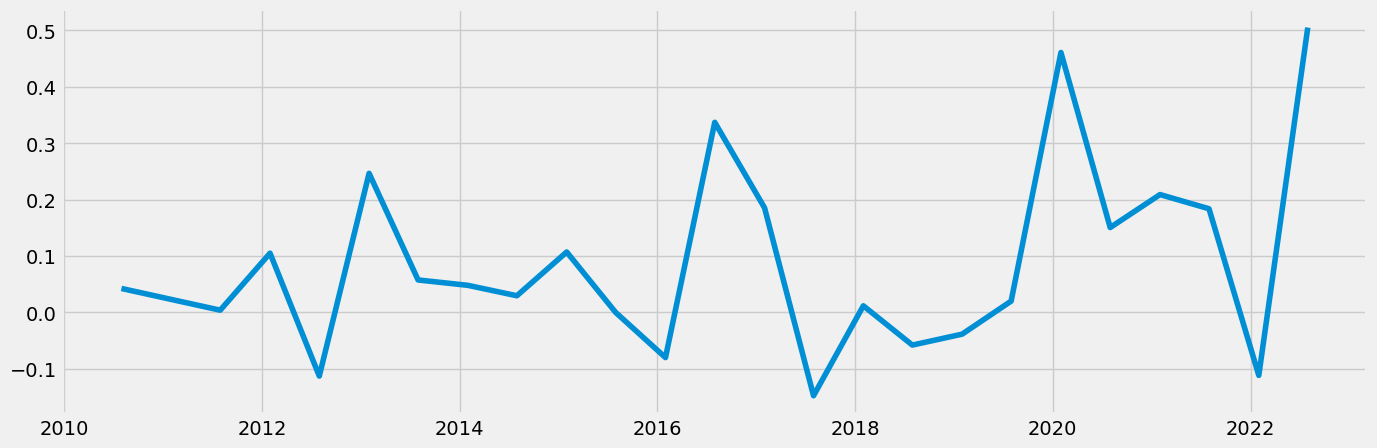

In [108]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [109]:
# Apply the test again using the function on the stationarized time series
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.708340
p-value                         0.000081
Number of Lags Used             0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


Now the Critical Value (5%) is not smaller than the test statistic anymore. This means, now we can reject the null hypothesis now, and the data is now stationary.

### 6. Check out the autocorrelations

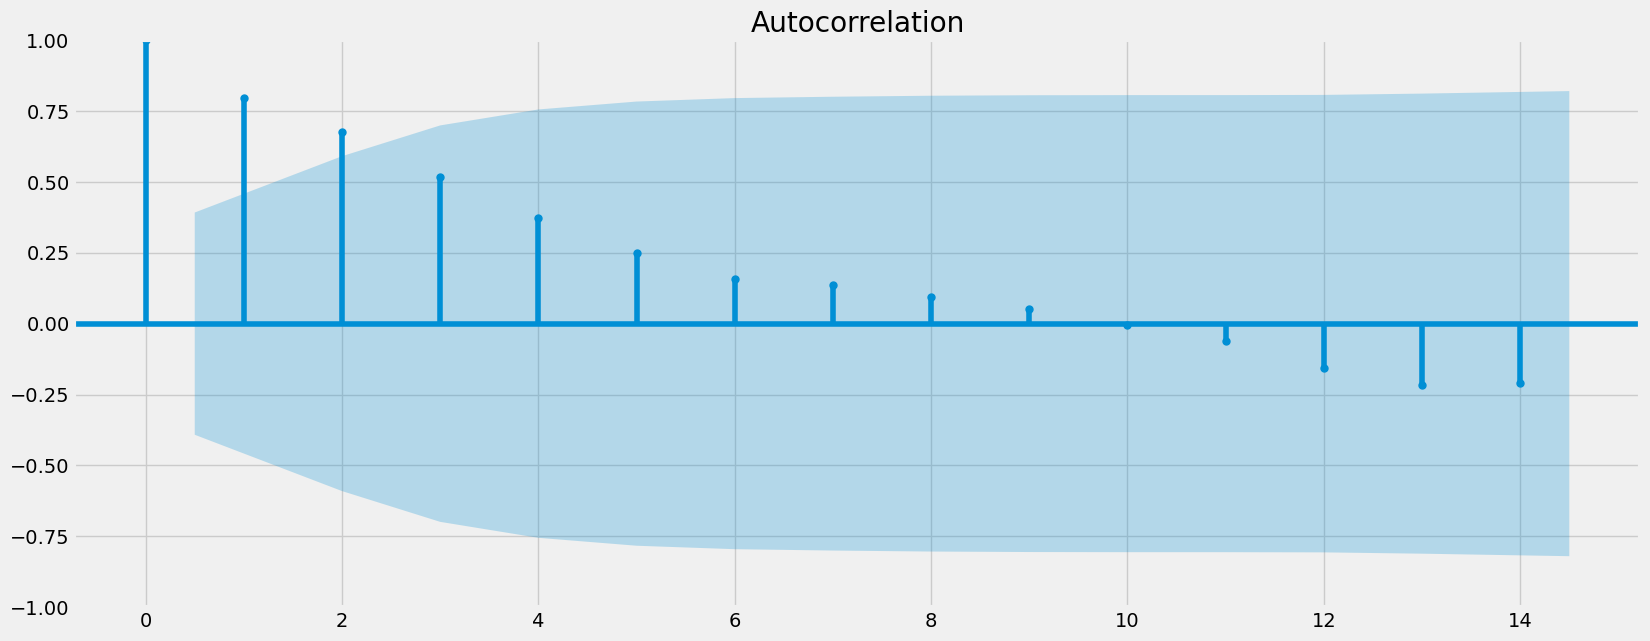

In [111]:
# Check out a plot of autocorrelations for data_sub
plot_acf(data_sub)
plt.show()

There are some lines going above the confidence interval, which means that we have lags that are significantly correlated with each other. This means there’s a lot of autocorrelated data and the set is likely non-stationary, which supports the result of the Dickey-Fuller test you conducted earlier. Therefore, let us run the check again on stationarized data_diff.

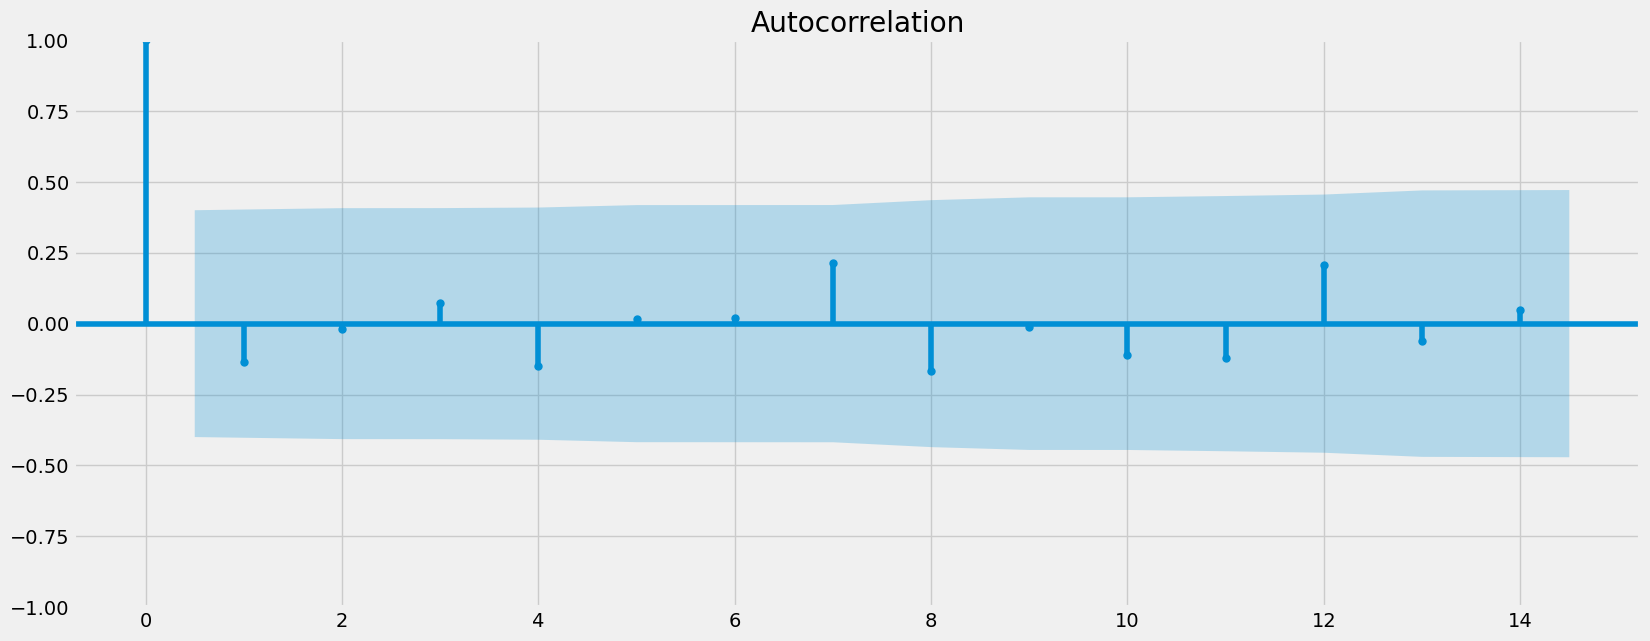

In [112]:
# Check out a plot of autocorrelations for data_diff

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()

While the autocorrelation plot has improved (there are fewer autocorrelated terms), it’s still not perfect. This means that, despite the Dickey-Fuller test saying that your data is stationary, that stationarity is weak. We will skip another round of differencing to stationarize the data further, because of the unspoken rule of thumb that you need at least ten significant lags for a second round of differencing to be necessary.